In [1]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


📄 ORIGINAL DATA (first 5 rows)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

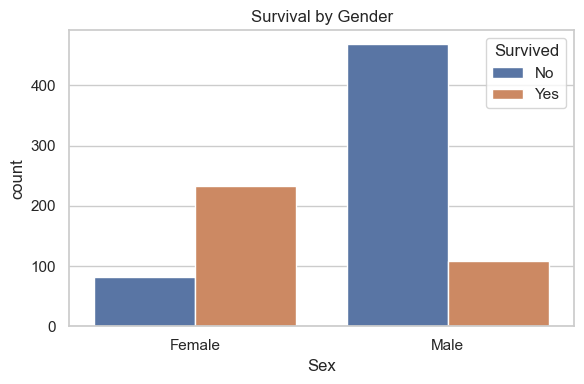

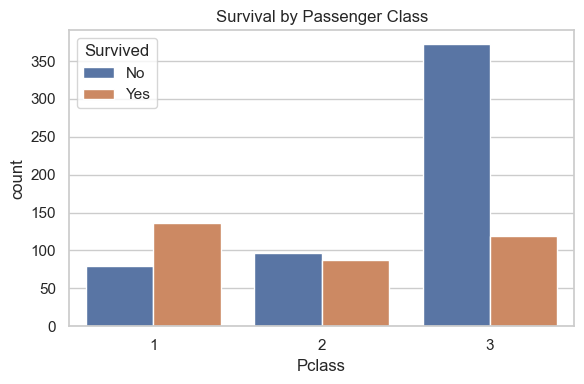

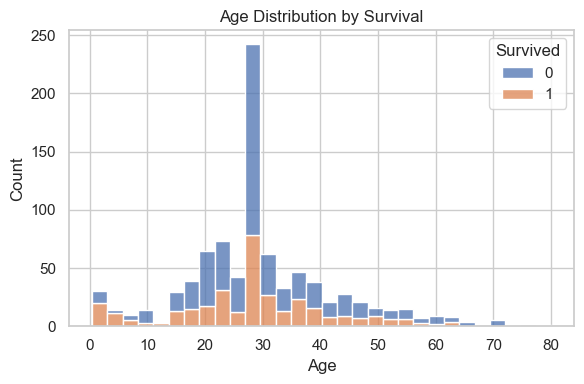

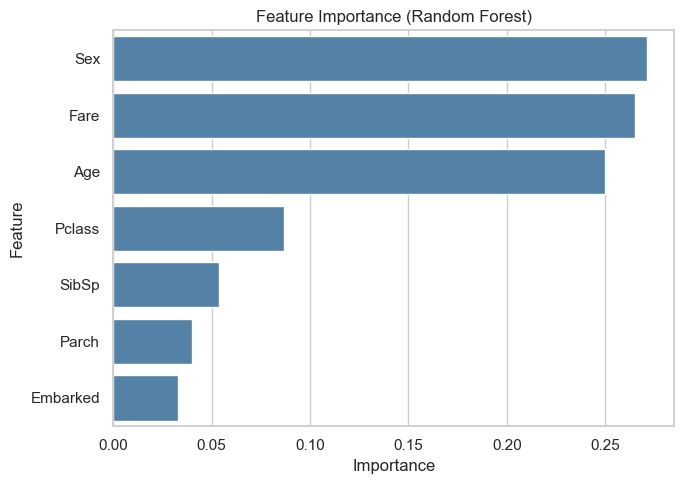

In [1]:

import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("titanic_data")

df = pd.read_csv("titanic_data/Titanic-Dataset.csv")
print("📄 ORIGINAL DATA (first 5 rows)")
print(df.head())
print("\n❓ Missing‑value count (original)\n", df.isnull().sum(), "\n")

df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
print("🧹 AFTER DROPPING COLUMNS (first 5 rows)")
print(df.head(), "\n")

df["Age"] = SimpleImputer(strategy="median").fit_transform(df[["Age"]])
df["Embarked"] = (
    SimpleImputer(strategy="most_frequent")
    .fit_transform(df[["Embarked"]])
    .ravel()
)

print("🧼 AFTER IMPUTATION — missing counts should be 0 now:\n", df.isnull().sum(), "\n")
print(df.head(), "\n")

le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])        
df["Embarked"] = le.fit_transform(df["Embarked"])

print("🔢 AFTER ENCODING CATEGORICALS (first 5 rows)")
print(df.head(), "\n")

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report\n", classification_report(y_test, y_pred))

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", bins=30)
plt.title("Age Distribution by Survival")
plt.tight_layout()
plt.show()

importances = model.feature_importances_
feat_df = (
    pd.DataFrame({"Feature": X.columns, "Importance": importances})
    .sort_values(by="Importance", ascending=False)
)

plt.figure(figsize=(7, 5))
sns.barplot(x="Importance", y="Feature", data=feat_df, color="steelblue")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()